# 数据分析步骤
1、导入必要的库

2、了解数据

3、数据可视化

4、使用k-means 进行聚类分析

## 1、导入库

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['font.sans-serif'] = ['SimHei']  # SimHei is another name for 黑体 in some systems
plt.rcParams['axes.unicode_minus'] = False


from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objects as go
import warnings
import os
warnings.filterwarnings('ignore')

## 2、了解数据

In [61]:
df=pd.read_csv('./data/data3.csv')
df.head()

,id,性别,年龄,收入,消费得分,是否流失
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [62]:
df.shape 

(200, 6)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   性别      200 non-null    object
 2   年龄      200 non-null    int64 
 3   收入      200 non-null    int64 
 4   消费得分    200 non-null    int64 
 5   是否流失    200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [64]:
df.dtypes

id       int64
性别      object
年龄       int64
收入       int64
消费得分     int64
是否流失     int64
dtype: object

In [65]:
df.isnull().sum()

id      0
性别      0
年龄      0
收入      0
消费得分    0
是否流失    0
dtype: int64

In [66]:
df.describe()

,id,年龄,收入,消费得分,是否流失
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.765000
std,57.879185,13.969007,26.264721,25.823522,0.425063
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


## 3、数据可视化

### 1）查看数据分布

In [44]:
# sns.pairplot(df)
# sns.pairplot(data, hue='churn', diag_kind='kde')

### 2）单独查看直方图分布

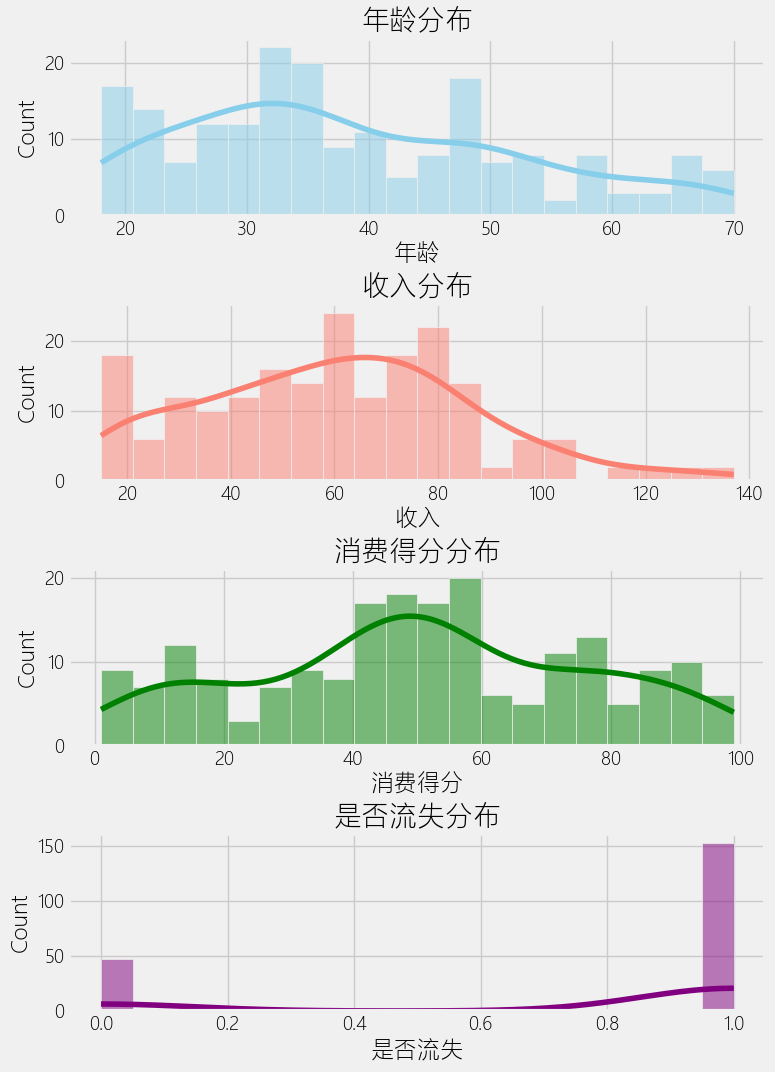

In [67]:
plt.figure(figsize=(8, 12))  # 调整整体图形大小

# 定义颜色列表
colors = ['skyblue', 'salmon', 'green', 'purple']

# 循环绘制直方图
for i, (column, color) in enumerate(zip(['年龄', '收入', '消费得分', '是否流失'], colors), 1):
    plt.subplot(4, 1, i)  # 将 1 改为 4
    sns.histplot(df[column], bins=20, kde=True, color=color)
    plt.title(f'{column}分布')

plt.subplots_adjust(hspace=0.5)  # 调整子图之间的垂直间距
plt.show()

### 3）样本数据中的性别比

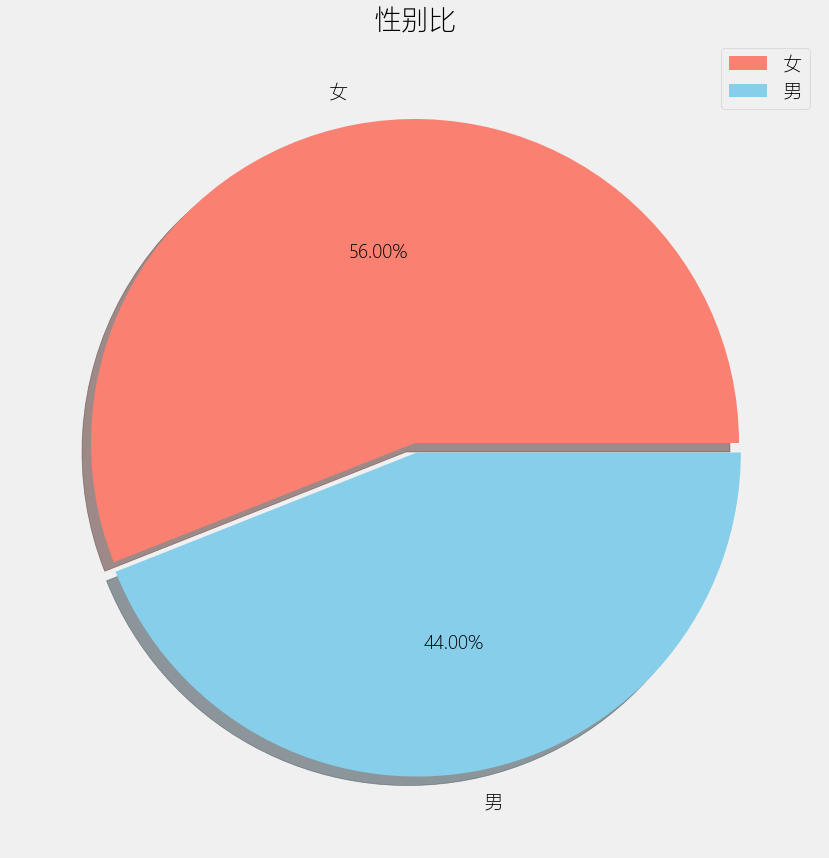

In [68]:
labels=['女','男'] 
size=df['性别'].value_counts()
explode=[0,0.03]
colors=['salmon','skyblue']

plt.figure(1,figsize=(10,10))
plt.pie(size,explode=explode,labels=labels,colors=colors,shadow=True,autopct='%.2f%%')
plt.title('性别比',fontsize=20)
plt.axis('off')
plt.legend(fontsize=14)
plt.show()

### 4）年龄与年收入之间的关系

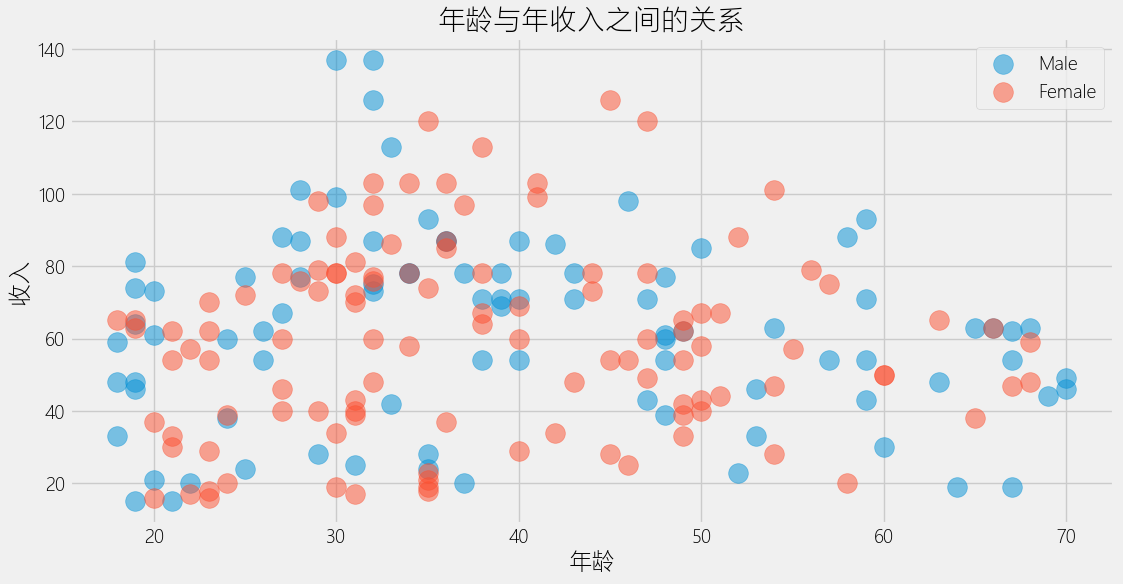

In [69]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:  
    plt.scatter(x='年龄',y='收入',data=df[df['性别']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('年龄'),plt.ylabel('收入') 
plt.title('年龄与年收入之间的关系')
plt.legend() 
plt.show()

### 5）年龄与消费得分之间的关系

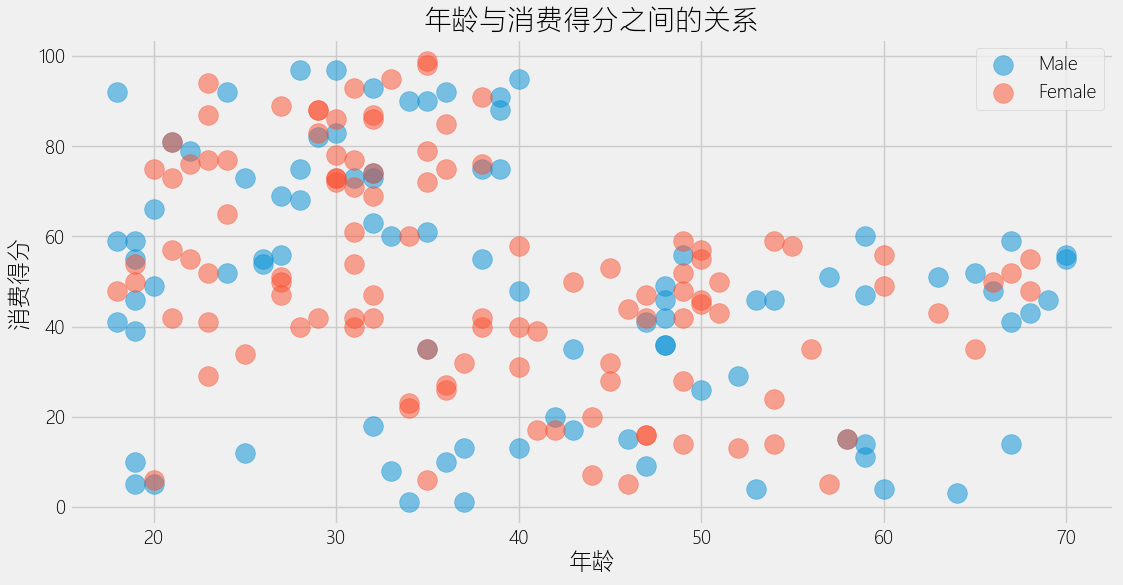

In [72]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:  
    plt.scatter(x='年龄',y='消费得分',data=df[df['性别']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('年龄'),plt.ylabel('消费得分') 
plt.title('年龄与消费得分之间的关系')
plt.legend() 
plt.show()

### 6）年收入与消费得分之间的关系

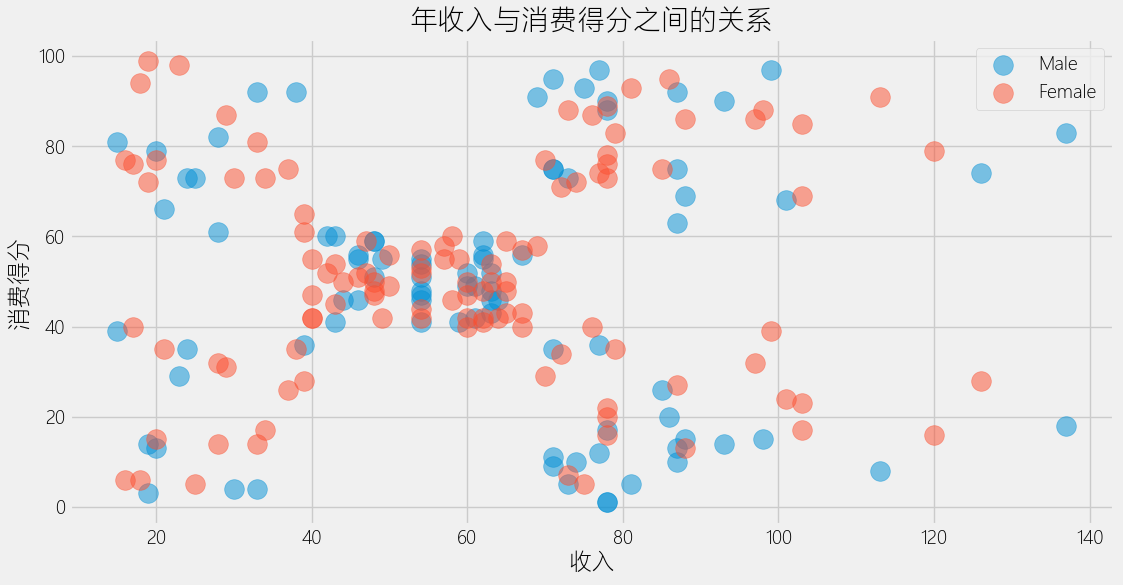

In [73]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:  
    plt.scatter(x='收入',y='消费得分',data=df[df['性别']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('收入'),plt.ylabel('消费得分') 
plt.title('年收入与消费得分之间的关系')
plt.legend() 
plt.show()

### 7）年龄与消费得分与年收入之间的分布

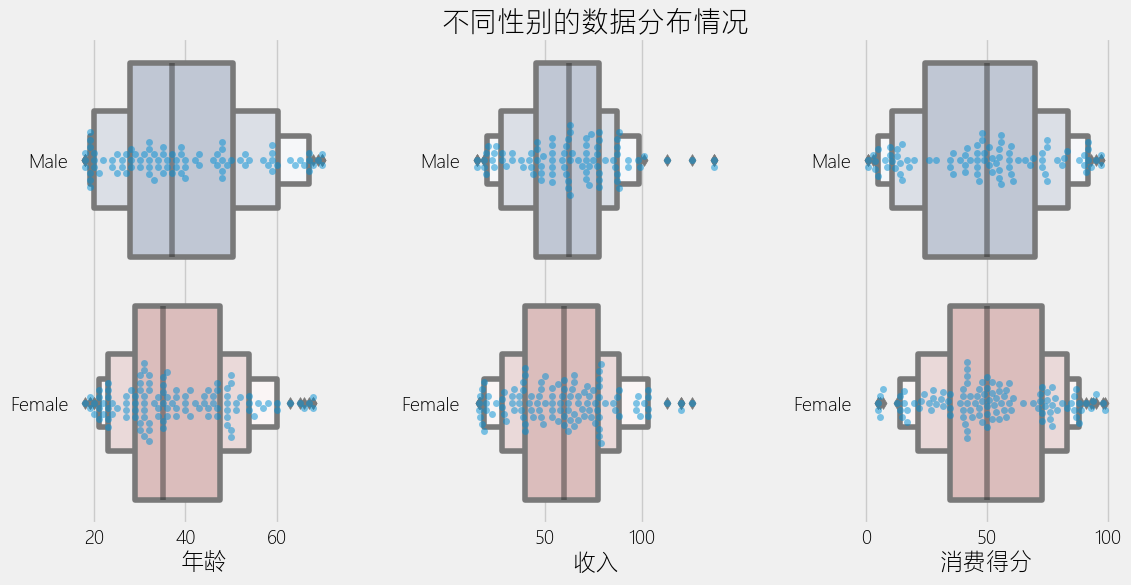

In [74]:
plt.figure(1,figsize=(12,6))
n=0
for cloname in ['年龄' , '收入' , '消费得分']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.boxenplot(x=cloname,y='性别',data=df,palette='vlag')
    sns.swarmplot(x=cloname,y='性别',data=df,alpha=0.5)
    plt.ylabel('' if n==1 else '')
    plt.title('不同性别的数据分布情况' if n==2 else '')
plt.show()

## 4、使用k - means聚类进行分析

### 1）根据年龄和消费得分进行细分

In [75]:
x1=df[['年龄','消费得分']].iloc[:,:].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    km.fit(x1)
    inertia.append(km.inertia_)

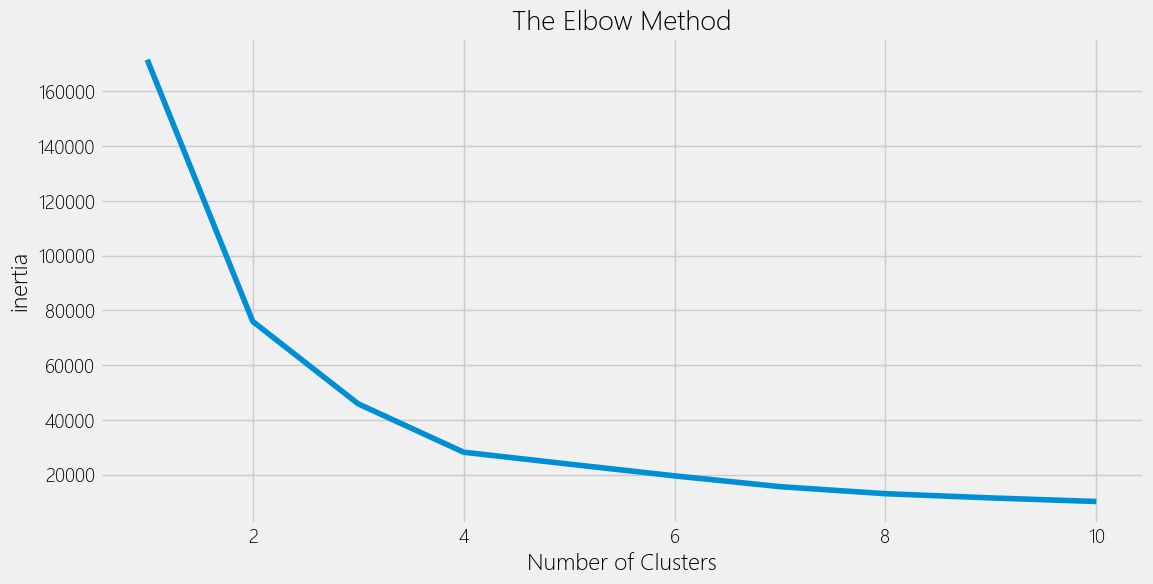

In [76]:
plt.figure(1,figsize=(12,6))    
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

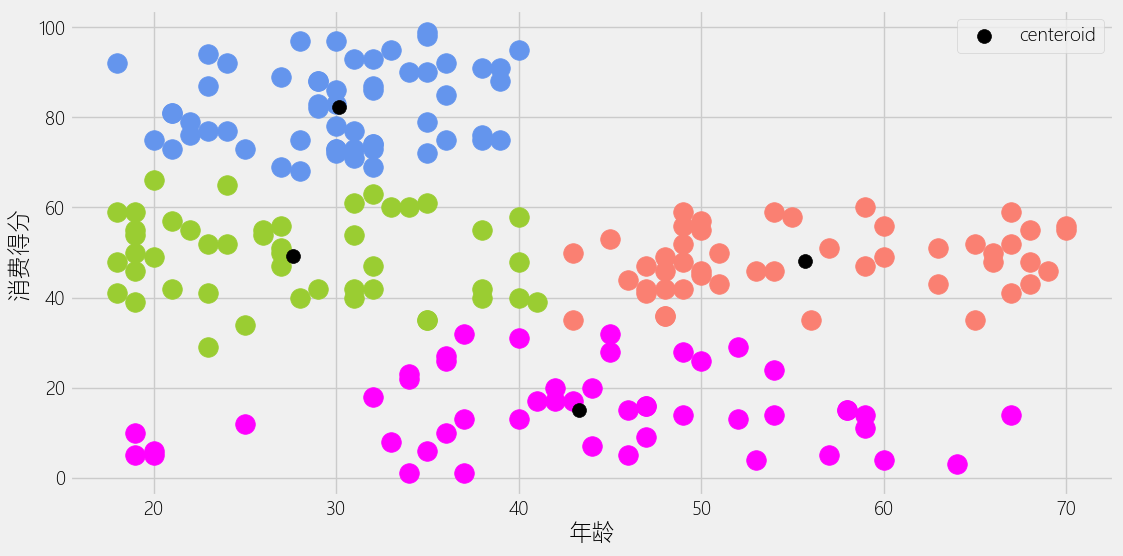

In [78]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_means = km.fit_predict(x1)

plt.figure(1 , figsize = (12 , 6) )
plt.scatter(x1[y_means == 0, 0], x1[y_means == 0, 1], s = 200, c = 'salmon')
plt.scatter(x1[y_means == 1, 0], x1[y_means == 1, 1], s = 200, c = 'yellowgreen') 
plt.scatter(x1[y_means == 2, 0], x1[y_means == 2, 1], s = 200, c = 'cornflowerblue')
plt.scatter(x1[y_means == 3, 0], x1[y_means == 3, 1], s = 200, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'black' , label = 'centeroid')

plt.ylabel('消费得分') , plt.xlabel('年龄')
plt.legend()
plt.show()

### 2）根据年收入和消费得分进行细分

In [79]:
x2=df[['收入','消费得分']].iloc[:,:].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    km.fit(x2)
    inertia.append(km.inertia_)

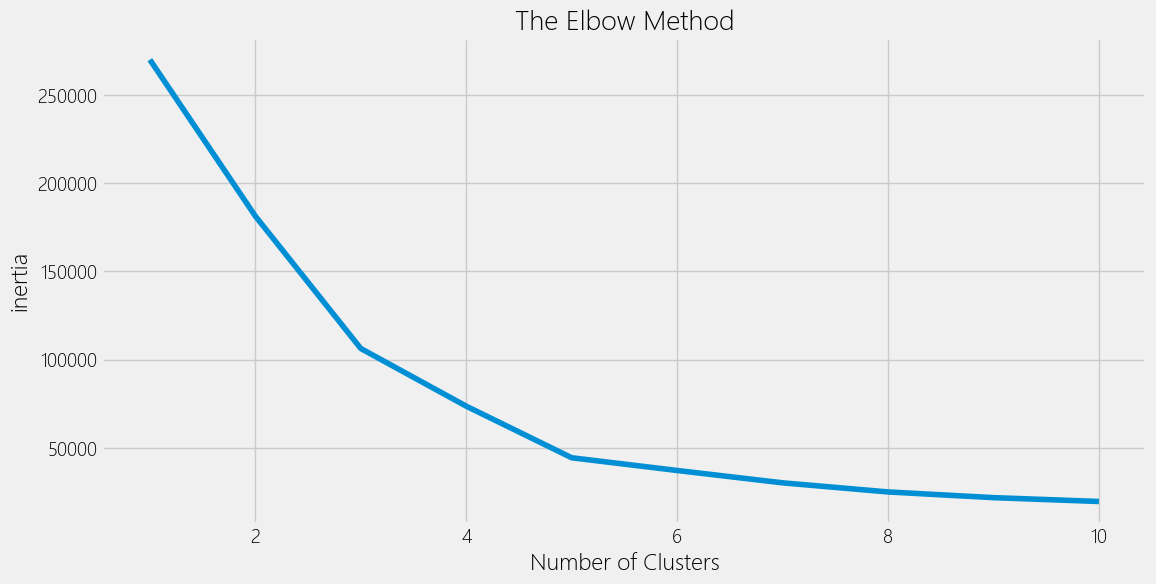

In [80]:
plt.figure(1,figsize=(12,6))    
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

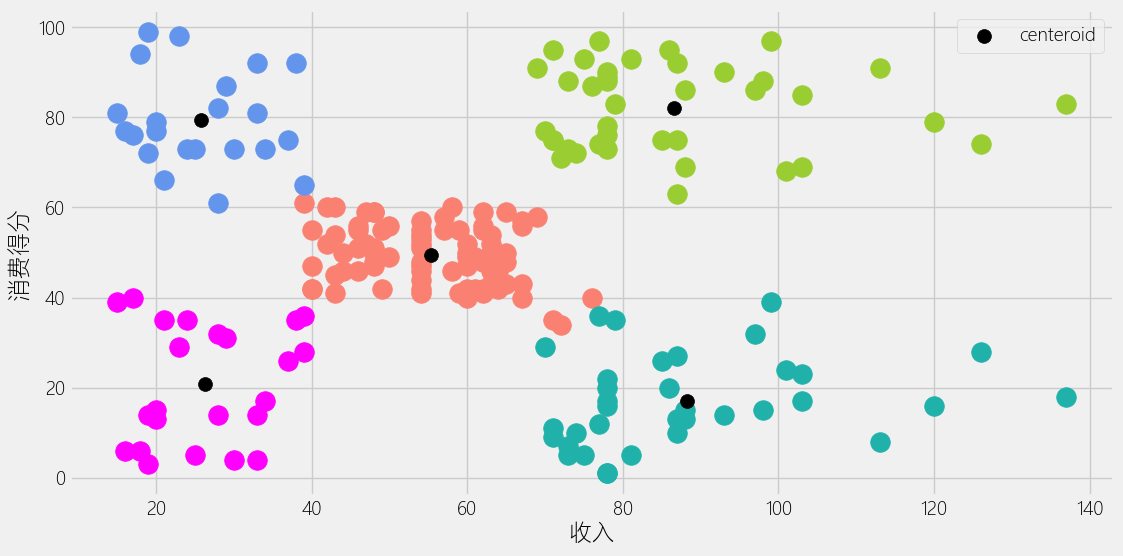

In [81]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_means = km.fit_predict(x2)

plt.figure(1 , figsize = (12 , 6) )
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 200, c = 'salmon')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 200, c = 'yellowgreen') 
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 200, c = 'cornflowerblue')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 200, c = 'magenta')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s = 200, c = 'LightSeaGreen')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'black',label = 'centeroid')

plt.ylabel('消费得分') , plt.xlabel('收入')
plt.legend()
plt.show()

### 3）根据年龄、年收入和消费得分进行细分

In [82]:
x3=df[['年龄' , '收入' ,'消费得分']].iloc[: , :].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x3)
    inertia.append(km.inertia_)

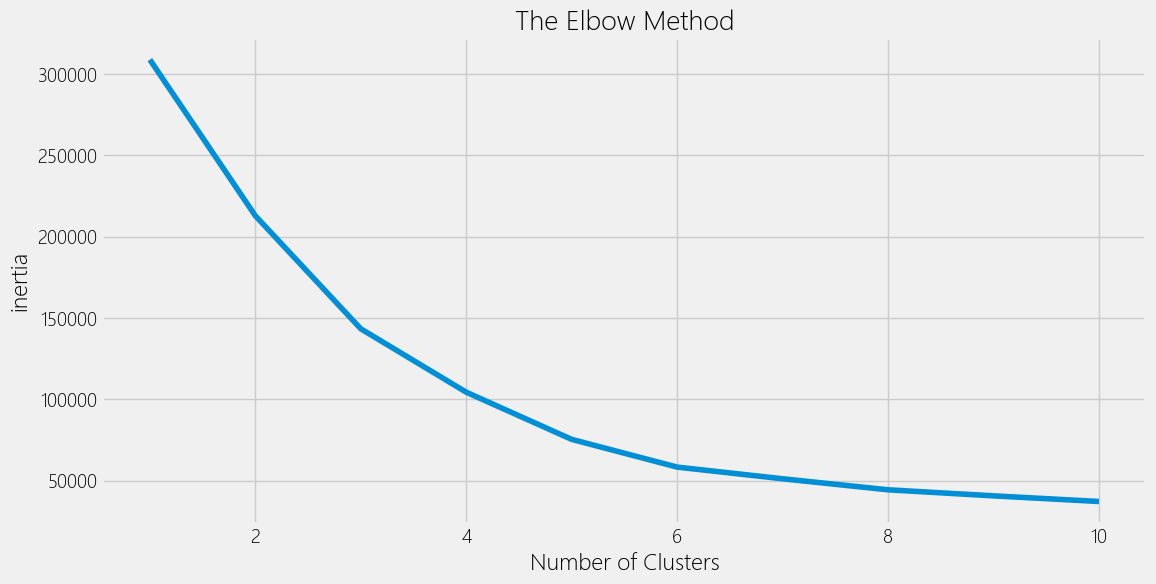

In [83]:
plt.figure(1,figsize=(12,6))    
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [84]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm.fit(x3)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [85]:
df['label'] =  labels
trace1 = go.Scatter3d(
    x= df['年龄'],
    y= df['消费得分'],
    z= df['收入'],
    mode='markers',
     marker=dict(
        color = df['label'], 
        size= 15,
        line=dict(
            color= df['label'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    height=800,
    width=800,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score (1-100)'),
            zaxis = dict(title  = 'Annual Income (k$)')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}


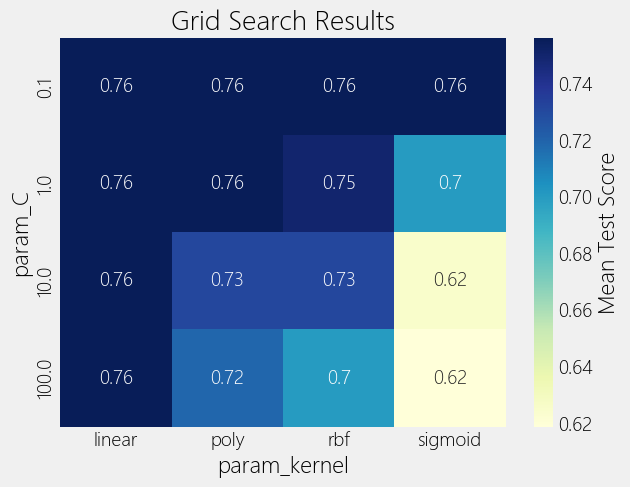

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 假设df是你的DataFrame，包含'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 和 'churn' 列

# 去除CustomerID列（确保列名大小写匹配）
df = df.drop('id', axis=1, errors='ignore')

# 独热编码
df = pd.get_dummies(df, drop_first=True)

# 划分特征集和目标变量
X = df.drop('是否流失', axis=1)
y = df['是否流失']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

# 定义SVM模型
svm_model = SVC()

# 定义超参数网格
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# 使用网格搜索
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 可视化网格搜索结果
results = pd.DataFrame(grid_search.cv_results_)
scores = results.pivot_table(values='mean_test_score', index='param_C', columns='param_kernel')

sns.heatmap(scores, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Results')
plt.show()


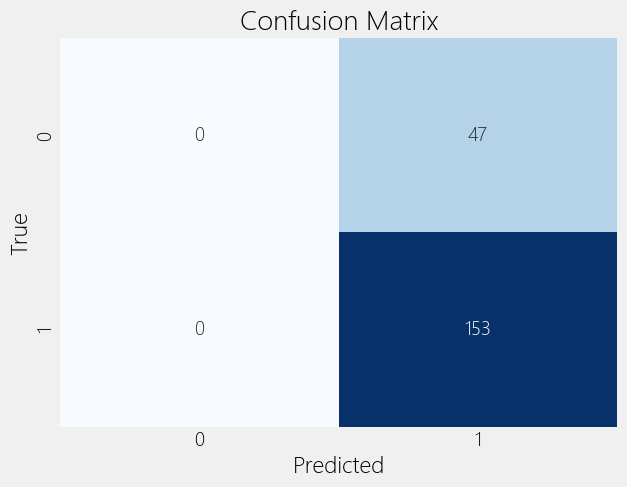

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.77      1.00      0.87       153

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200



In [87]:
# 使用最佳参数重新训练模型
best_svm_model = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'])
best_svm_model.fit(X_train, y_train)

# 预测所有数据
all_predictions = best_svm_model.predict(X_scaled)

# 混淆矩阵
conf_matrix = confusion_matrix(y, all_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 打印分类报告
print(classification_report(y, all_predictions))


In [99]:
import pandas as pd
import numpy as np

# 创建新的数据集 newdata
newdata = pd.DataFrame({
    'id': range(1, 1001),
    '性别': np.random.choice(['1', '0'], size=1000),
    '年龄': np.random.randint(18, 65, size=1000),
    '收入': np.random.randint(15, 131, size=1000),
    '消费得分': np.random.randint(20, 101, size=1000)
})
# pd
# 对 newdata 进行预处理
# # 对 newdata 进行预处理
# newdata_encoded = pd.get_dummies(newdata, columns=['性别'],prefix='性别', drop_first=True)
# newdata_encoded
# # 移除 'CustomerID' 列
# newdata_encoded = newdata_encoded.drop('id', axis=1, errors='ignore')
newdata_encoded
# # 提取特征并进行数据标准化
# newdata_scaled = scaler.transform(newdata_encoded)

# # 预测新数据的 churn
# newdata_predictions = best_svm_model.predict(newdata_scaled)

# # 将预测结果添加到 newdata 中
# newdata['预测是否流失'] = newdata_predictions

# # 打印预测结果的前几行
# print(newdata[['id', '性别', '年龄', '收入', '消费得分', '预测是否流失']].head())

# predicted_churn_counts = newdata['预测是否流失'].value_counts()

,年龄,收入,消费得分,性别_1
0,47,108,97,1
1,21,27,92,1
2,52,16,81,0
3,61,62,21,0
4,21,67,66,1
...,...,...,...,...
995,45,39,70,0
996,30,75,100,1
997,46,125,31,1
998,53,47,99,1


In [ ]:
sns.boxplot(x='预测是否流失', y='年龄', data=newdata)
plt.title('Box Plot of Age with Predicted Churn')
plt.show()
predicted_churn_counts = newdata['预测是否流失'].value_counts()

In [ ]:
import seaborn as sns
sns.pairplot(newdata[['年龄', '收入', '消费得分', '预测是否流失']], hue='预测是否流失')
plt.show()
